In [1]:
from pandas import read_csv
import numpy as np
#from keras.saving import load_model
import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,GRU,LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from decimal import Decimal

In [27]:
itxt="5.txt"
np1=np.loadtxt(itxt)
print(np1.shape)

(19997, 12)


In [2]:
itxt="5.txt"
with open(itxt,"r") as f:
    datalist = f.readlines()
datanp=np.zeros((len(datalist),11))
count=0
for i in datalist:
    datai=i.split("\n")[0].split("\t")
    for j in range(11):
        datanp[count:count+1,j]=Decimal(datai[j])
    count=count+1
print(datanp[0:1,:],datanp.shape)

[[1670.05     0.       0.       0.       0.      68.585    0.       0.
    36.36   -11.32   -88.09 ]] (19997, 11)


In [3]:
itxt1="7.txt"
with open(itxt1,"r") as f:
    datalist1 = f.readlines()
datanp1=np.zeros((len(datalist1),11))
count1=0
for i in datalist1:
    datai=i.split("\n")[0].split("\t")
    for j in range(11):
        datanp1[count1:count1+1,j]=Decimal(datai[j])
    count1=count1+1
print(datanp1[0:1,:],datanp1.shape)

[[880.11         0.           0.           0.           0.
   67.8328125    0.           0.          36.51       -11.24690476
  -89.22      ]] (15991, 11)


In [4]:
itxt2="13.txt"
with open(itxt2,"r") as f:
    datalist2 = f.readlines()
datanp2=np.zeros((len(datalist2),11))
count2=0
for i in datalist2:
    datai=i.split("\n")[0].split("\t")
    for j in range(11):
        datanp2[count2:count2+1,j]=Decimal(datai[j])
    count2=count2+1
print(datanp2[0:1,:],datanp2.shape)

[[1130.2        0.         0.         0.         0.        57.60125
     0.         0.        36.09     -11.28     -92.71   ]] (16982, 11)


In [5]:
datanp=datanp[2000:,]
print(datanp.shape)

(17997, 11)


In [6]:
lpwm=datanp[:,1:2]*datanp[:,3:4]
rpwm=datanp[:,2:3]*datanp[:,4:5]*(-1)
pwm=lpwm+rpwm
v=datanp[:,6:7]

lpwm1=datanp1[:,1:2]*datanp1[:,3:4]
rpwm1=datanp1[:,2:3]*datanp1[:,4:5]*(-1)
pwm1=lpwm1+rpwm1
v1=datanp1[:,6:7]

In [11]:
lpwm2=datanp2[:,1:2]*datanp2[:,3:4]
rpwm2=datanp2[:,2:3]*datanp2[:,4:5]*(-1)
pwm2=lpwm2+rpwm2
v2=datanp2[:,6:7]
val_data = np.hstack((v2,pwm2))

In [12]:
train_data = np.hstack((v,pwm))
test_data = np.hstack((v1,pwm1))
train_data.shape

(17997, 2)

In [17]:
def create_DNN( dense_units, input_shape, activation):
    model = Sequential()
    model.add(Dense(units=dense_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[0]))
    model.add(Dense(units=1, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
model = create_DNN(dense_units=100, input_shape=(1,), activation=['relu', 'linear']) 

In [18]:
model.fit(train_data[:,0:1], train_data[:,1:2],validation_data=(test_data[:,0:1], test_data[:,1:2]), epochs=100)

Epoch 1/100
563/563 [==============================] - 3s 4ms/step - loss: 0.0282 - val_loss: 0.0242
Epoch 2/100
563/563 [==============================] - 2s 4ms/step - loss: 0.0258 - val_loss: 0.0223
Epoch 3/100
563/563 [==============================] - 2s 4ms/step - loss: 0.0252 - val_loss: 0.0223
Epoch 4/100
563/563 [==============================] - 2s 4ms/step - loss: 0.0253 - val_loss: 0.0227
Epoch 5/100
563/563 [==============================] - 2s 4ms/step - loss: 0.0251 - val_loss: 0.0225
Epoch 6/100
563/563 [==============================] - 2s 4ms/step - loss: 0.0251 - val_loss: 0.0221
Epoch 7/100
563/563 [==============================] - 2s 4ms/step - loss: 0.0251 - val_loss: 0.0223
Epoch 8/100
563/563 [==============================] - 2s 4ms/step - loss: 0.0250 - val_loss: 0.0225
Epoch 9/100
563/563 [==============================] - 2s 3ms/step - loss: 0.0250 - val_loss: 0.0220
Epoch 10/100
563/563 [==============================] - 2s 3ms/step - loss: 0.0250 - val_lo

563/563 [==============================] - 2s 3ms/step - loss: 0.0247 - val_loss: 0.0221
Epoch 82/100
563/563 [==============================] - 2s 3ms/step - loss: 0.0247 - val_loss: 0.0221
Epoch 83/100
563/563 [==============================] - 2s 4ms/step - loss: 0.0247 - val_loss: 0.0222
Epoch 84/100
563/563 [==============================] - 2s 3ms/step - loss: 0.0247 - val_loss: 0.0229
Epoch 85/100
563/563 [==============================] - 2s 3ms/step - loss: 0.0247 - val_loss: 0.0224
Epoch 86/100
563/563 [==============================] - 2s 3ms/step - loss: 0.0247 - val_loss: 0.0223
Epoch 87/100
563/563 [==============================] - 2s 3ms/step - loss: 0.0247 - val_loss: 0.0221
Epoch 88/100
563/563 [==============================] - 2s 3ms/step - loss: 0.0247 - val_loss: 0.0220
Epoch 89/100
563/563 [==============================] - 2s 3ms/step - loss: 0.0247 - val_loss: 0.0222
Epoch 90/100
563/563 [==============================] - 2s 3ms/step - loss: 0.0247 - val_loss: 

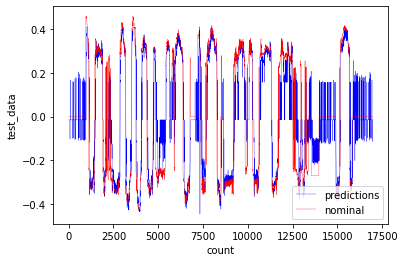

In [26]:
#y_test=model.predict(train_data[:,0:1])
#y_test=model.predict(test_data[:,0:1])
y_test=model.predict(val_data[:,0:1])
t=np.linspace(0, len(y_test), num=len(y_test))
plt.figure()
plt.plot(t,y_test, color='blue', marker=' ', linestyle='solid',linewidth=0.3, markersize=5,label="predictions")
#plt.plot(t,test_data[:,1:2], color='red', marker=' ', linestyle='solid',linewidth=0.3, markersize=5, label="nominal")
#plt.plot(t,train_data[:,1:2], color='red', marker=' ', linestyle='solid',linewidth=0.3, markersize=5, label="nominal")
plt.plot(t,val_data[:,1:2], color='red', marker=' ', linestyle='solid',linewidth=0.3, markersize=5, label="nominal")
plt.legend(loc='best')
plt.xlabel("count")
plt.ylabel("test_data")
pngf="test1_NN.png"
plt.savefig(pngf, dpi=500)

In [24]:
model.save("NN_vpwm")
os.system("python3 -m tf2onnx.convert --saved-model NN_vpwm --output NN_vpwm.onnx --opset 13")

INFO:tensorflow:Assets written to: NN_vpwm/assets


0

In [25]:
model.predict([[0.2]])

array([[-0.02780545]], dtype=float32)

In [22]:
import os
os.getcwd()

'/home/weiding/Loader'